Uses unlabeled machine learning to train an anomaly detection model

Applies the model to classify logs as normal or anomalous

Compares the predictions with known labels (for validation)



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/preprocessed_unsw_nb15.csv'
df = pd.read_csv(file_path)

In [ ]:
X = df.drop(columns=['label'])
y_true = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, stratify=y_true, random_state=42)

#Train Isolation Forest only on training data
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X_train)

IsolationForest(contamination=0.1, random_state=42)

Most classification evaluation tools and visualizations assume the positive class (anomaly) is labeled as 1, and the negative class (normal) as 0.

To align with this convention, we convert the model’s output as follows:

Convert Isolation Forest predictions to binary format:

-1 (anomaly) becomes 1

 1 (normal) becomes 0

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = np.where(y_train_pred == -1, 1, 0)
train_acc = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
y_test_pred = np.where(y_test_pred == -1, 1, 0)
test_acc = accuracy_score(y_test, y_test_pred)

print(f" Training Accuracy: {train_acc:.4f}")
print(f" Test Accuracy: {test_acc:.4f}")

 Training Accuracy: 0.8204
 Test Accuracy: 0.8187


In [ ]:
results_df = X_test.copy()
results_df['true_label'] = y_test.values
results_df['predicted_anomaly'] = y_test_pred

# Show only detected anomalies
anomalies = results_df[results_df['predicted_anomaly'] == 1]

print(" Sample detected anomalies:")
display(anomalies.head(10))

 Sample detected anomalies:


,src_ip,src_port,dst_ip,dst_port,proto,service,state,dur,sbytes,dbytes,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,true_label,predicted_anomaly
103258,0.948718,0.720809,0.511628,0.969174,0.850746,0.333333,1.768106e-04,0.001343,0.074231,0.121569,...,0.024390,0.024390,0.102041,0.028571,0.000000,0.000000,1.000000,0.0,0,1
80721,0.948718,0.949179,0.558140,0.969174,0.850746,0.333333,3.325025e-04,0.001427,0.074231,0.121569,...,0.000000,0.000000,0.020408,0.028571,0.000000,0.000000,1.000000,0.0,0,1
107690,0.692308,0.721878,0.209302,0.856833,0.895522,0.400000,3.414275e-10,0.000018,0.000000,0.996078,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777778,1.0,0,1
108602,0.923077,0.389154,0.139535,0.969174,0.850746,0.333333,1.474555e-04,0.001419,0.074231,0.121569,...,0.048780,0.195122,0.040816,0.028571,0.000000,0.000000,1.000000,0.0,0,1
20813,0.076923,0.000015,0.744186,0.000016,0.589552,0.600000,5.690962e-03,0.000028,0.000000,0.003922,...,0.073171,0.073171,0.020408,0.028571,0.090909,0.027027,1.000000,0.0,0,1
23267,0.641026,0.469414,0.348837,0.018627,0.895522,0.400000,1.138092e-10,0.000012,0.000000,0.996078,...,0.048780,0.024390,0.000000,0.000000,0.000000,0.000000,0.666667,1.0,1,1
11149,0.692308,0.749101,0.255814,0.135099,0.850746,0.333333,1.313385e-04,0.000054,0.000024,0.996078,...,0.146341,0.000000,0.020408,0.000000,0.000000,0.000000,1.000000,0.0,0,1
9017,0.743590,0.270824,0.697674,0.670208,0.283582,0.866667,0.000000e+00,0.000130,0.000000,0.250980,...,0.024390,0.024390,0.020408,0.000000,0.000000,0.027027,1.000000,0.0,1,1
256877,0.871795,0.830524,0.441860,0.951881,0.850746,0.333333,6.656407e-04,0.001817,0.074702,0.121569,...,0.268293,0.073171,0.122449,0.000000,0.000000,0.027027,1.000000,0.0,0,1
119284,0.666667,0.637976,0.372093,0.732872,0.895522,0.400000,1.138092e-09,0.000008,0.000000,0.996078,...,0.097561,0.073171,0.061224,0.085714,0.090909,0.081081,0.555556,1.0,0,1


In [ ]:
print(" Classification Report:")
print(classification_report(y_test, y_pred))

 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    126021
           1       0.09      0.09      0.09     13980

    accuracy                           0.82    140001
   macro avg       0.50      0.50      0.50    140001
weighted avg       0.82      0.82      0.82    140001



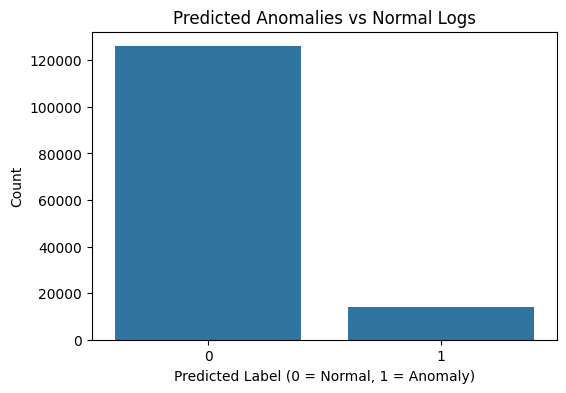

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='predicted_anomaly', data=results_df)
plt.title('Predicted Anomalies vs Normal Logs')
plt.xlabel('Predicted Label (0 = Normal, 1 = Anomaly)')
plt.ylabel('Count')
plt.show()

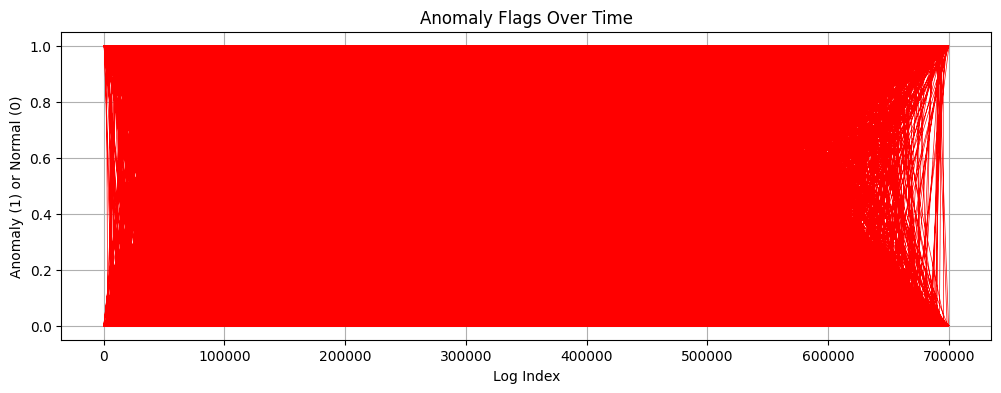

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(results_df.index, results_df['predicted_anomaly'], color='red', linewidth=0.5)
plt.title('Anomaly Flags Over Time')
plt.xlabel('Log Index')
plt.ylabel('Anomaly (1) or Normal (0)')
plt.grid(True)
plt.show()

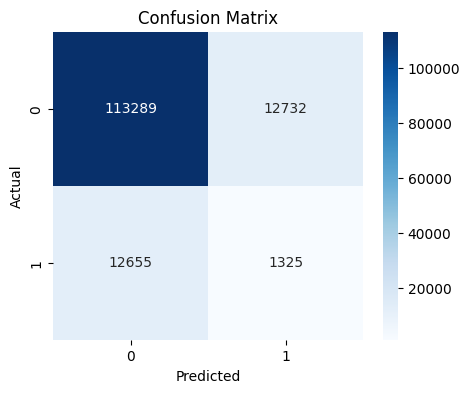

In [ ]:
plt.figure(figsize=(5, 4))
conf_matrix = pd.crosstab(results_df['true_label'], results_df['predicted_anomaly'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
anomalies = results_df[results_df['predicted_anomaly'] == 1]
print(" Top 10 Detected Anomalies:")
display(anomalies.head(2))

 Top 10 Detected Anomalies:


,src_ip,src_port,dst_ip,dst_port,proto,service,state,dur,sbytes,dbytes,...,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,true_label,predicted_anomaly
103258,0.948718,0.720809,0.511628,0.969174,0.850746,0.333333,0.000177,0.001343,0.074231,0.121569,...,0.02439,0.02439,0.102041,0.028571,0.0,0.0,1.0,0.0,0,1
80721,0.948718,0.949179,0.558140,0.969174,0.850746,0.333333,0.000333,0.001427,0.074231,0.121569,...,0.00000,0.00000,0.020408,0.028571,0.0,0.0,1.0,0.0,0,1
